In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import collections
import math

In [13]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(64):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        # print(df.columns)
        
        df.drop(df[(df['Y']<=0)].index, inplace=True)
        
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [14]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")

# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")

# allDate.shape


# data1 = data1[data1[:, 1] > 0 ] 


NameError: name 'labels' is not defined

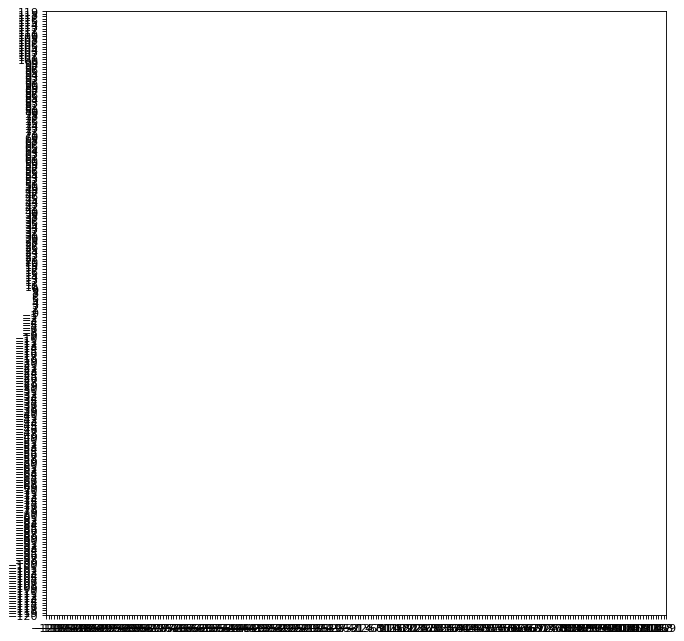

In [15]:
grid_size= 1
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))
# plt.grid()

plt.scatter(allData[0]['Z'], allData[0]['X'], s=10,  c=labels)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()

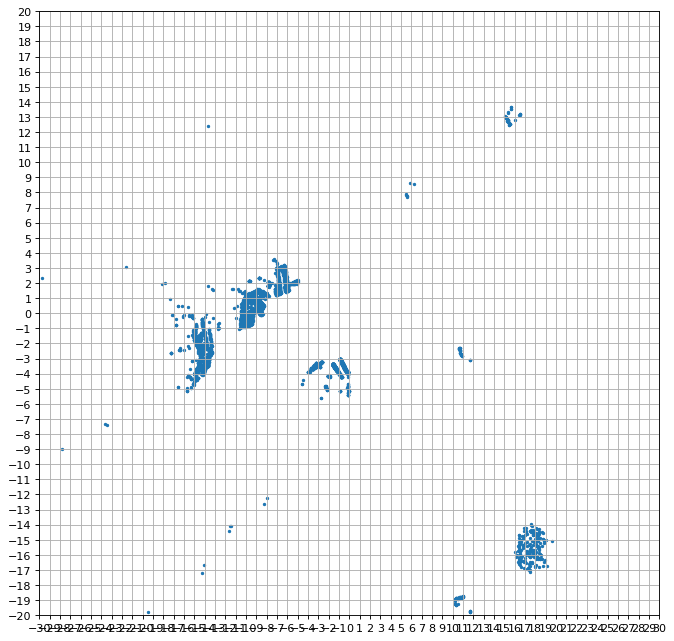

In [16]:
grid_size= 1
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca()
ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))
# plt.grid()
plt.scatter(allData[0]['Z'], allData[0]['X'], s=4)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()

In [ ]:
def isInt(value):
    try:
        int(value)
        return True
    except:
        return False


numOfObjects = []

# Out put data.
# We need to get the number of objects. 
pathOutput="/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/out.csv"

with open(pathOutput) as fp:  
   line = fp.readline()
   cnt = 1
   while line:
    # print("Line {}: {}".format(cnt, line.strip()))
        lineArr=line.split(",")
        num = 0
        for index in range(1, len(lineArr)):
            if(isInt(lineArr[index])):
               num +=int(lineArr[index])
        numOfObjects.append(num)
        #print(line.split(",")[1])
        line = fp.readline()
        cnt += 1
        
        
        
print(max(numOfObjects))

aList=np.array(numOfObjects)
print(np.mean(aList))
print(np.median(aList))

In [ ]:
# clustering with DBSCAN 
def doClusteringWithDBSCAN(data):
    
    clustering = DBSCAN(eps=1, min_samples=16).fit(data)

    labels = clustering.labels_

    labels = labels +1 
    
    return max(labels)

In [ ]:
# run a test. 

sum = 0 
for i in range(64):
    data =  np.array(list(zip(np.array(allData[i]['X']), np.array(allData[i]['Y']), np.array(allData[i]['Z'])))) 
   
    
    numberOfClusters = doClusteringWithDBSCAN(data)
    # print("Number Of Clusters: ", numberOfClusters, ", Difference is: ", numOfObjects[i] - numberOfClusters)
    
    sum = sum + (abs(numOfObjects[i] - numberOfClusters))
    

print(sum)
    
    

In [ ]:
Sum_of_squared_distances = []

    
for k in range(min_cluster_number, max_cluster_number):
    if(data.size <= k):
        break
    
    km = KMeans(n_clusters=k, max_iter=100, random_state=0)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

numberOfClusters = 1
for i in range(1, len(Sum_of_squared_distances)):
    ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
    # elbow ratio is an important parameter. 
    if(ratio < Elbow_ratio):
        numberOfClusters=i+1
        break
# final run with large iterations 
km = KMeans(n_clusters=numberOfClusters, max_iter=100, random_state=0)
km = km.fit(data)

In [32]:
from sklearn.cluster import MiniBatchKMeans






kmeans = MiniBatchKMeans(n_clusters=26, random_state=0, max_iter=50, batch_size=100)

data1 =  np.array(list(zip(np.array(allData[0]['X']), np.array(allData[0]['Y']), np.array(allData[0]['Z'])))) 


# print(data1)
kmeans = kmeans.partial_fit(data1)

kmeans.inertia_

384942.6741975268

In [75]:
from sklearn.cluster import MiniBatchKMeans


def doClusteringWitkMiniBatchKmeans(data, min_cluster_number=10, max_cluster_number=50, Elbow_ratio = 1.02):
    Sum_of_squared_distances = []

    
    for k in range(min_cluster_number, max_cluster_number):
        if(data.size <= k):
            break
        km = MiniBatchKMeans(n_clusters=k, batch_size=int(np.size(data,0) * 1), max_iter=100, random_state=0)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    numberOfClusters = 1
    for i in range(1, len(Sum_of_squared_distances)):
        ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
        # elbow ratio is an important parameter. 
        if(ratio < Elbow_ratio):
            numberOfClusters=i+1
            break
    # final run with large iterations 
    km = KMeans(n_clusters=numberOfClusters, max_iter=100, random_state=0)
    km = km.fit(data)
    # print(km.cluster_centers_)
    
    return numberOfClusters, km.cluster_centers_

In [76]:
sum = 0 
for i in range(64):
    data =  np.array(list(zip(np.array(allData[i]['X']), np.array(allData[i]['Y']), np.array(allData[i]['Z'])))) 
   
    print(np.size(data,0), int(np.size(data,0) *.1))
    numberOfClusters, cluster_centers = doClusteringWitkMiniBatchKmeans(data)
    
    # print(numberOfClusters)
    print("Number Of Clusters: ", numberOfClusters, ", Difference is: ", numOfObjects[i] - numberOfClusters)
    
    sum = sum + (abs(numOfObjects[i] - numberOfClusters))
    

print(sum)

13678 1367
Number Of Clusters:  13 , Difference is:  20
13320 1332
Number Of Clusters:  16 , Difference is:  9
11508 1150
Number Of Clusters:  29 , Difference is:  -4
11178 1117
Number Of Clusters:  18 , Difference is:  -1
7446 744
Number Of Clusters:  7 , Difference is:  9
11815 1181
Number Of Clusters:  11 , Difference is:  23
10462 1046
Number Of Clusters:  13 , Difference is:  22
7623 762
Number Of Clusters:  2 , Difference is:  18
11314 1131
Number Of Clusters:  9 , Difference is:  8
12920 1292
Number Of Clusters:  27 , Difference is:  5
14870 1487
Number Of Clusters:  6 , Difference is:  33
18994 1899
Number Of Clusters:  15 , Difference is:  32
17524 1752
Number Of Clusters:  12 , Difference is:  28
6594 659
Number Of Clusters:  9 , Difference is:  3
8287 828
Number Of Clusters:  9 , Difference is:  10
10868 1086
Number Of Clusters:  4 , Difference is:  22
8297 829
Number Of Clusters:  14 , Difference is:  2
10679 1067
Number Of Clusters:  20 , Difference is:  10
11725 1172
Numb

KeyboardInterrupt: 

In [135]:
i=0
data1 =  np.array(list(zip(np.array(allData[i]['X']), np.array(allData[i]['Y']), np.array(allData[i]['Z'])))) 

# data1.shape 

# data1[:, 2].shape
# data1[:, 1]
data1 = data1[data1[:, 1] > 0 ] 


data1 


# np.where(data1 > 3 )
# np.array(data1, axis=1 )





array([[  2.621516,   7.147645, -31.218798],
       [  0.71388 ,   1.878286,  -8.501369],
       [  0.716843,   1.817899,  -8.536659],
       ...,
       [  0.      ,   0.437457, -10.454196],
       [  0.      ,   0.35965 , -10.506788],
       [  0.      ,   1.737599, -65.275566]])